## Cleaning Data

### Cleaning pt.1

In [ ]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Import Data
df = pd.read_csv("/content/twitter_pelaku.csv")
df

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1791216850233184730,Thu May 16 21:19:10 +0000 2024,0,Rada sangsi anjir sama kasus ini️ kalo misal p...,1791216850233184730,NaN,NaN,in,NaN,0,1,0,https://twitter.com/Mokasellingacc/status/1791...,1640942429653319681,Mokasellingacc
1,1790597665178493077,Thu May 16 21:17:21 +0000 2024,0,@RadioElshinta apa karena Vina bukan orang kay...,1791216390944256315,NaN,RadioElshinta,in,Mars,0,0,0,https://twitter.com/FoodaholicPr/status/179121...,1479500281,FoodaholicPr
2,1791009937537282522,Thu May 16 21:14:54 +0000 2024,0,@humaspoldajbr Teman Pelaku udah tertangkap......,1791215774431862888,NaN,humaspoldajbr,in,Amukti Palapa,0,0,0,https://twitter.com/MPrimbon/status/1791215774...,1521559637572550656,MPrimbon
3,1791215718823801183,Thu May 16 21:14:41 +0000 2024,0,Ketika tindakan pelaku bully di sekolah terlal...,1791215718823801183,NaN,NaN,in,タンゲラン,0,0,0,https://twitter.com/Enji_PW/status/17912157188...,3089248219,Enji_PW
4,1791081564165828902,Thu May 16 21:06:54 +0000 2024,0,@donaldarmen @bacottetangga_ Yg kakak adik itu...,1791213759278546963,NaN,donaldarmen,in,Jakarta Capital Region,0,0,0,https://twitter.com/gula_jawwa/status/17912137...,1530573306944172032,gula_jawwa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1791055080776732688,Thu May 16 10:36:55 +0000 2024,0,gw selalu akan berpikir kalo orang yg permisif...,1791055219478184365,NaN,criminace,in,NaN,0,0,0,https://twitter.com/criminace/status/179105521...,2348368146,criminace
502,1791054915579883850,Thu May 16 10:35:42 +0000 2024,0,Solusi parkir liar: Memberantas pelaku Dikelol...,1791054915579883850,NaN,NaN,in,"Bekasi, Jawa Barat",0,0,1,https://twitter.com/haryonoagung/status/179105...,69308762,haryonoagung
503,1791054784642081072,Thu May 16 10:35:20 +0000 2024,1,Rp. 35.520.000.000. Atas perbuatannya para pel...,1791054821291925892,NaN,BeltimSi,in,NaN,0,1,0,https://twitter.com/BeltimSi/status/1791054821...,1403200318729461765,BeltimSi
504,1791054784642081072,Thu May 16 10:35:18 +0000 2024,1,Selanjutnya baby lobster tersebut masuk kesala...,1791054812605477015,NaN,BeltimSi,in,NaN,0,1,0,https://twitter.com/BeltimSi/status/1791054812...,1403200318729461765,BeltimSi


In [ ]:
# Select Necessary Columns
df = df[['full_text', 'username', 'created_at']]
df

,full_text,username,created_at
0,Rada sangsi anjir sama kasus ini️ kalo misal p...,Mokasellingacc,Thu May 16 21:19:10 +0000 2024
1,@RadioElshinta apa karena Vina bukan orang kay...,FoodaholicPr,Thu May 16 21:17:21 +0000 2024
2,@humaspoldajbr Teman Pelaku udah tertangkap......,MPrimbon,Thu May 16 21:14:54 +0000 2024
3,Ketika tindakan pelaku bully di sekolah terlal...,Enji_PW,Thu May 16 21:14:41 +0000 2024
4,@donaldarmen @bacottetangga_ Yg kakak adik itu...,gula_jawwa,Thu May 16 21:06:54 +0000 2024
...,...,...,...
501,gw selalu akan berpikir kalo orang yg permisif...,criminace,Thu May 16 10:36:55 +0000 2024
502,Solusi parkir liar: Memberantas pelaku Dikelol...,haryonoagung,Thu May 16 10:35:42 +0000 2024
503,Rp. 35.520.000.000. Atas perbuatannya para pel...,BeltimSi,Thu May 16 10:35:20 +0000 2024
504,Selanjutnya baby lobster tersebut masuk kesala...,BeltimSi,Thu May 16 10:35:18 +0000 2024


In [ ]:
# Data Shape
df.shape

(506, 3)

In [ ]:
# Drop Duplicate Data
df = df.drop_duplicates(subset=['full_text'])
df.duplicated().sum()

df = df.dropna()
df.isnull().sum()

full_text     0
username      0
created_at    0
dtype: int64

In [ ]:
# Data Shape After Drop Duplication
df.shape

(505, 3)

In [ ]:
# Cleaning Process
def clean_twitter_text(text):
  text = re.sub(r'@[A-Za-z0-9_]+', '', text) #penghapusan mention
  text = re.sub(r'#\w+', '', text) #penghapusan hashtag
  text = re.sub(r'RT[\s]+', '', text) #penghapusan retweet
  text = re.sub(r'https?://\S+', '', text) #penghapusan url

  text = re.sub(r'[^A-Za-z0-9 ]', '', text) #penghapusan karakter non-alpha numeric
  text = re.sub(r'\s+', ' ', text).strip() #menghapus spasi berlebihan

  return text

df['full_text'] = df['full_text'].apply(clean_twitter_text)

In [ ]:
# Download File
df.to_csv("/content/data_cleaning.csv", index=False)

### Cleaning pt.2

In [ ]:
# Import Data
df = pd.read_csv("/content/data_translate.csv")
df

,full_text,username,created_at
0,i'm a little doubtful about this case if for ...,Mokasellingacc,Thu May 16 21:19:10 +0000 2024
1,Is it because Vina is not rich or because the ...,FoodaholicPr,Thu May 16 21:17:21 +0000 2024
2,the perpetrator's friend has been caught clea...,MPrimbon,Thu May 16 21:14:54 +0000 2024
3,when the actions of bullies at school are too ...,Enji_PW,Thu May 16 21:14:41 +0000 2024
4,the brothers and sisters are the victim's wife...,gula_jawwa,Thu May 16 21:06:54 +0000 2024
...,...,...,...
457,I would always think that a person who is perm...,criminace,Thu May 16 10:36:55 +0000 2024
458,Illegal parking solutions eradicate state-mana...,haryonoagung,Thu May 16 10:35:42 +0000 2024
459,Rp 3552 billion for their actions the perpet...,BeltimSi,Thu May 16 10:35:20 +0000 2024
460,Next the baby lobster entered one of the hous...,BeltimSi,Thu May 16 10:35:18 +0000 2024


In [ ]:
# Cleaning Process
def clean_twitter_text(text):
  text = re.sub(r'@[A-Za-z0-9_]+', '', text) #penghapusan mention
  text = re.sub(r'#\w+', '', text) #penghapusan hashtag
  text = re.sub(r'RT[\s]+', '', text) #penghapusan retweet
  text = re.sub(r'https?://\S+', '', text) #penghapusan url

  text = re.sub(r'[^A-Za-z0-9 ]', '', text) #penghapusan karakter non-alpha numeric
  text = re.sub(r'\s+', ' ', text).strip() #menghapus spasi berlebihan

  return text

df['full_text'] = df['full_text'].apply(clean_twitter_text)

In [ ]:
df.shape

(462, 3)

In [ ]:
# Drop Duplicate Data
df = df.drop_duplicates(subset=['full_text'])
df.duplicated().sum()

df = df.dropna()
df.isnull().sum()

full_text     0
username      0
created_at    0
dtype: int64

In [ ]:
df.shape

(459, 3)

## Preprocessing

### Case Folding

In [ ]:
df['full_text'] = df['full_text'].str.lower()

In [ ]:
# Download File
df.to_csv("/content/data_casefold.csv", index=False)

### Normalization

In [ ]:
norm = {"vina":"the girl", "vinas":"her","egy":"Man", "wow":" "}

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['full_text'] = df['full_text'].apply(lambda x: normalisasi(x))
df

,full_text,username,created_at
0,im a little doubtful about this case if for ex...,Mokasellingacc,Thu May 16 21:19:10 +0000 2024
1,is it because the girl is not rich or because ...,FoodaholicPr,Thu May 16 21:17:21 +0000 2024
2,the perpetrators friend has been caught clear ...,MPrimbon,Thu May 16 21:14:54 +0000 2024
3,when the actions of bullies at school are too ...,Enji_PW,Thu May 16 21:14:41 +0000 2024
4,the brothers and sisters are the victims wife ...,gula_jawwa,Thu May 16 21:06:54 +0000 2024
...,...,...,...
457,i would always think that a person who is perm...,criminace,Thu May 16 10:36:55 +0000 2024
458,illegal parking solutions eradicate statemanag...,haryonoagung,Thu May 16 10:35:42 +0000 2024
459,rp 3552 billion for their actions the perpetra...,BeltimSi,Thu May 16 10:35:20 +0000 2024
460,next the baby lobster entered one of the house...,BeltimSi,Thu May 16 10:35:18 +0000 2024


In [ ]:
# Download File
df.to_csv("/content/data_normalization.csv", index=False)

### Tokenizing

In [ ]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import nltk

In [ ]:
# Download stopwords and punkt tokenizer from NLTK
nltk.download('stopwords')
nltk.download('punkt')

# Define function to tokenize, stem, and remove stopwords
def tokenized(text):
    # Tokenize the text
    word_tokens = word_tokenize(text)
    return word_tokens


# Apply the function to the DataFrame column
token = df['full_text'].apply(lambda x: tokenized(x))
token

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0      [im, a, little, doubtful, about, this, case, i...
1      [is, it, because, the, girl, is, not, rich, or...
2      [the, perpetrators, friend, has, been, caught,...
3      [when, the, actions, of, bullies, at, school, ...
4      [the, brothers, and, sisters, are, the, victim...
                             ...                        
457    [i, would, always, think, that, a, person, who...
458    [illegal, parking, solutions, eradicate, state...
459    [rp, 3552, billion, for, their, actions, the, ...
460    [next, the, baby, lobster, entered, one, of, t...
461    [how, many, perpetrators, of, sexual, harassme...
Name: full_text, Length: 459, dtype: object

In [ ]:
token.to_csv("/content/data_tokenized.csv", index=False)

### Filtering

In [ ]:
# Download stopwords and punkt tokenizer from NLTK
nltk.download('stopwords')
nltk.download('punkt')

# Define function to tokenize, stem, and remove stopwords
def filtered_text(text):
    # Tokenize the text
    word_tokens = word_tokenize(text)
    # Filter out the stopwords
    stop_words = set(stopwords.words('english'))
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    return filtered_sentence

# Apply the function to the DataFrame column
filt = df['full_text'].apply(lambda x: filtered_text(x))
filt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0      [im, little, doubtful, case, example, perpetra...
1        [girl, rich, perpetrator, son, police, officer]
2      [perpetrators, friend, caught, clear, name, cl...
3      [actions, bullies, school, often, condoned, pa...
4      [brothers, sisters, victims, wife, perpetrator...
                             ...                        
457    [would, always, think, person, permissive, beh...
458    [illegal, parking, solutions, eradicate, state...
459    [rp, 3552, billion, actions, perpetrators, cha...
460    [next, baby, lobster, entered, one, houses, co...
461    [many, perpetrators, sexual, harassment, kebra...
Name: full_text, Length: 459, dtype: object

In [ ]:
filt.to_csv("/content/data_filtered.csv", index=False)

### Stemming

In [ ]:
# Download stopwords and punkt tokenizer from NLTK
nltk.download('stopwords')
nltk.download('punkt')

# Initialize the Porter Stemmer
porter_stemmer = PorterStemmer()

# Define function to tokenize, stem, and remove stopwords
def preprocess_text(text):
    # Tokenize the text
    word_tokens = word_tokenize(text)
    # Filter out the stopwords
    stop_words = set(stopwords.words('english'))
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    # Stem the filtered tokens
    stemmed_sentence = [porter_stemmer.stem(word) for word in filtered_sentence]
    # Join the stemmed tokens back into a single string
    return ' '.join(stemmed_sentence)

# Apply the function to the DataFrame column
df = df[['full_text']]
df['processed_text'] = df['full_text'].apply(preprocess_text)

# Display the result
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-23-08f2662f39fb>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed_text'] = df['full_text'].apply(preprocess_text)


,full_text,processed_text
0,im a little doubtful about this case if for ex...,im littl doubt case exampl perpetr arrest impr...
1,is it because the girl is not rich or because ...,girl rich perpetr son polic offic
2,the perpetrators friend has been caught clear ...,perpetr friend caught clear name clear address...
3,when the actions of bullies at school are too ...,action bulli school often condon parent teache...
4,the brothers and sisters are the victims wife ...,brother sister victim wife perpetr wife husban...
...,...,...
457,i would always think that a person who is perm...,would alway think person permiss behavior like...
458,illegal parking solutions eradicate statemanag...,illeg park solut erad statemanag perpetr
459,rp 3552 billion for their actions the perpetra...,rp 3552 billion action perpetr charg articl 92...
460,next the baby lobster entered one of the house...,next babi lobster enter one hous contract perp...


In [ ]:
df.to_csv("/content/data_stemming.csv", index=False)

## Labelling

In [ ]:
# Import Data
data = pd.read_csv("/content/data_stemming.csv")
data

,full_text,processed_text
0,im a little doubtful about this case if for ex...,im littl doubt case exampl perpetr arrest impr...
1,is it because the girl is not rich or because ...,girl rich perpetr son polic offic
2,the perpetrators friend has been caught clear ...,perpetr friend caught clear name clear address...
3,when the actions of bullies at school are too ...,action bulli school often condon parent teache...
4,the brothers and sisters are the victims wife ...,brother sister victim wife perpetr wife husban...
...,...,...
454,i would always think that a person who is perm...,would alway think person permiss behavior like...
455,illegal parking solutions eradicate statemanag...,illeg park solut erad statemanag perpetr
456,rp 3552 billion for their actions the perpetra...,rp 3552 billion action perpetr charg articl 92...
457,next the baby lobster entered one of the house...,next babi lobster enter one hous contract perp...


In [ ]:
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [ ]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Klasifikasi sentimen tweet
data_tweet = list(df['processed_text'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
  analysis = TextBlob(tweet)
  polaritas += analysis.polarity

  if analysis.sentiment.polarity > 0.0:
    total_positif += 1
    status.append('Positif')
  elif analysis.sentiment.polarity == 0.0:
    total_netral += 1
    status.append('Netral')
  else:
    total_negatif += 1
    status.append('Negatif')

  total += 1

print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')

Hasil Analisis Data:
Positif = 155
Netral = 148
Negatif = 156

Total Data : 459


In [ ]:
# Pelabelan
data['klasifikasi'] = status
data

,full_text,processed_text,klasifikasi
0,im a little doubtful about this case if for ex...,im littl doubt case exampl perpetr arrest impr...,Positif
1,is it because the girl is not rich or because ...,girl rich perpetr son polic offic,Positif
2,the perpetrators friend has been caught clear ...,perpetr friend caught clear name clear address...,Positif
3,when the actions of bullies at school are too ...,action bulli school often condon parent teache...,Positif
4,the brothers and sisters are the victims wife ...,brother sister victim wife perpetr wife husban...,Negatif
...,...,...,...
454,i would always think that a person who is perm...,would alway think person permiss behavior like...,Netral
455,illegal parking solutions eradicate statemanag...,illeg park solut erad statemanag perpetr,Netral
456,rp 3552 billion for their actions the perpetra...,rp 3552 billion action perpetr charg articl 92...,Positif
457,next the baby lobster entered one of the house...,next babi lobster enter one hous contract perp...,Netral


## Visualisasi

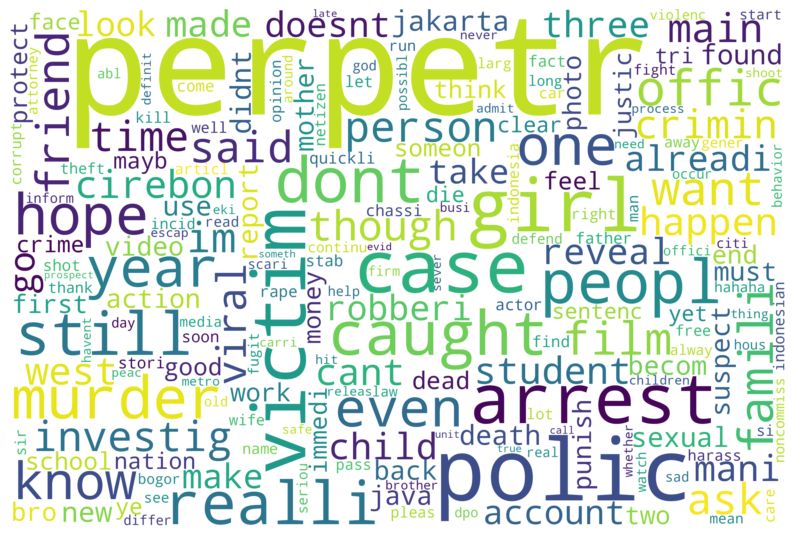

In [ ]:
from wordcloud import WordCloud, STOPWORDS

# Function to plot the WordCloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Combine all processed text into one string
all_words = ' '.join([text for text in data['processed_text']])

# Generate WordCloud
wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='white',
    colormap='viridis',
    collocations=False,
    stopwords=STOPWORDS
).generate(all_words)

# Plot the WordCloud
plot_cloud(wordcloud)

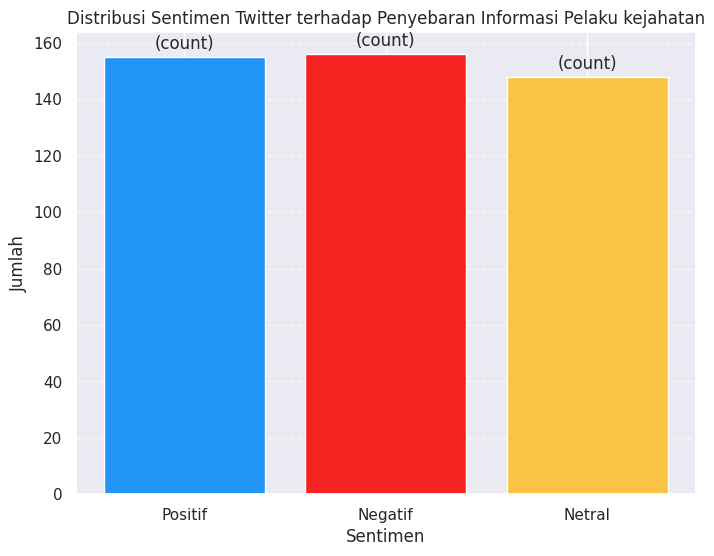

In [ ]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
  fig, ax = plt.subplots(figsize=(8,6))
  bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

  for bar, count in zip(bars, counts):
    height = bar.get_height()
    ax.annotate(f'(count)', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0,3),
                textcoords="offset points",
                ha='center', va='bottom')

  ax.grid(axis='y', linestyle='--', alpha=0.7)

  ax.set_xlabel('Sentimen')
  ax.set_ylabel('Jumlah')
  ax.set_title(title)

  plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Twitter terhadap Penyebaran Informasi Pelaku kejahatan")

# Klasifikasi Sentimen

In [ ]:
dataset = data.drop(['processed_text'], axis=1, inplace=False)
dataset = [tuple(x) for x in dataset.to_records(index=False)]

In [ ]:
import random

set_positif = []
set_negatif = []
set_netral = []

for n in dataset:
  if(n[1] == 'Positif'):
    set_positif.append(n)
  elif(n[1] == 'Negatif'):
    set_negatif.append(n)
  else:
    set_netral.append(n)

set_positif = random.sample(set_positif, k=int(len(set_positif)/2))
set_negatif = random.sample(set_negatif, k=int(len(set_negatif)/2))
set_netral = random.sample(set_netral, k=int(len(set_netral)/2))

train = set_positif + set_negatif + set_netral

train_set = []

for n in train:
  train_set.append(n)

In [ ]:
# Cek Akurasi
from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(train_set)
print("Akurasi Test:", cl.accuracy(dataset))

Akurasi Test: 0.7647058823529411


In [ ]:
# Labeling
data_tweet = list(data['processed_text'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
  analysis = TextBlob(tweet, classifier=cl)

  if analysis.classify() == 'Positif':
    total_positif += 1
  elif analysis.classify() == 'Netral':
    total_netral += 1
  else:
    total_negatif += 1

  status.append(analysis.classify())
  total += 1

print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')

Hasil Analisis Data:
Positif = 48
Netral = 291
Negatif = 120

Total Data : 459


In [ ]:
status = pd.DataFrame({"Klasifikasi Bayes": status})
data['klasifikasi_bayes'] = status

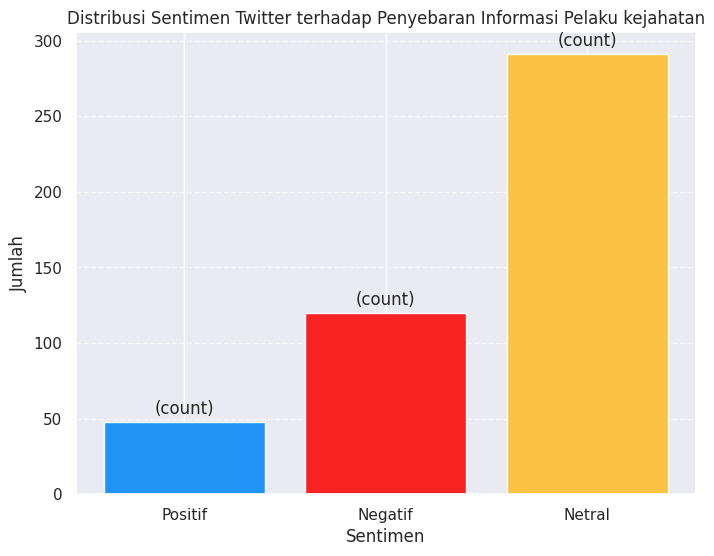

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
  fig, ax = plt.subplots(figsize=(8,6))
  bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

  for bar, count in zip(bars, counts):
    height = bar.get_height()
    ax.annotate(f'(count)', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0,3),
                textcoords="offset points",
                ha='center', va='bottom')

  ax.grid(axis='y', linestyle='--', alpha=0.7)

  ax.set_xlabel('Sentimen')
  ax.set_ylabel('Jumlah')
  ax.set_title(title)

  plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Twitter terhadap Penyebaran Informasi Pelaku kejahatan")